# Define the flow potential

In [1]:
import sympy as sp
sp.init_printing()

## Logic behind the flow potential extension

To account for a broad range of applications we propose
an extension of the flow potential with an adjustable 
level of interaction between the damage in the normal
and tangential directions. Recall that the evolution equations
are defined as
\begin{align}
 \dot{\omega}_\mathrm{N} &= \lambda \frac{\partial \varphi}{ \partial {\omega}_\mathrm{N} } \\
 \dot{\omega}_\mathrm{T} &= \lambda \frac{\partial \varphi}{ \partial {\omega}_\mathrm{T} }
\end{align}
If the damage due to normal direction directly affects the tangential version we assume
that also the opposite affect is the same. The respective derivatives of the potential must be equal, i.e.
\begin{align}
\frac{\partial \varphi}{ \partial {\omega}_\mathrm{N} } = \frac{\partial \varphi}{ \partial {\omega}_\mathrm{T} }
\end{align}

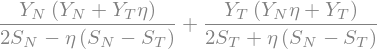

In [4]:
S_N, S_T, eta = sp.symbols('S_N, S_T, eta')
Y_N, Y_T = sp.symbols('Y_N, Y_T')
omega_N, omega_T = sp.symbols('omega_N, omega_T')
c_N, c_T = sp.symbols('c_N, c_T')
phi_N_ext = (  # (1-omega_N)**c_N * (
    (1*Y_N*(Y_N + eta * Y_T)) /
    (2*(S_N - eta * (S_N - (S_N + S_T)/2)))
)
phi_T_ext = (  # (1-omega_T)**c_T * (
    (1*Y_T*(Y_T + eta * Y_N)) /
    (2*(S_T - eta * (S_T - (S_N + S_T)/2)))
)
phi_ext = sp.simplify(phi_N_ext) + sp.simplify(phi_T_ext)
phi_ext

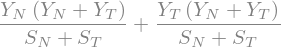

In [5]:
phi_ext.subs(eta,1)

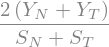

In [6]:
sp.simplify(phi_ext.diff(Y_N).subs(eta,1))

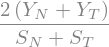

In [7]:
sp.simplify(phi_ext.diff(Y_T).subs(eta,1))

In [8]:
sp.simplify(phi_ext.diff(Y_N).subs(eta,0))

## Backward derivation of the potential from desired flow direction

Find a potential function 
\begin{align}
\varphi = a Y_\mathrm{N}^2 + \eta b Y_\mathrm{N}(Y_\mathrm{N} + Y_\mathrm{T})+ c Y_\mathrm{T}^2 + \eta d 
Y_\mathrm{T}(Y_\mathrm{T} + Y_\mathrm{N})
\end{align}
which fulfills
\begin{align}
\left. \frac{\partial \varphi}{\partial Y_\mathrm{N}}\right|_{\eta=0} &= 
(1 - \omega_\mathrm{N})^{c_\mathrm{N}} \frac{Y_\mathrm{N}}{S_\mathrm{N}} \\
\left. \frac{\partial \varphi}{\partial Y_\mathrm{T}}\right|_{\eta=0} &= 
(1 - \omega_\mathrm{T})^{c_\mathrm{T}} \frac{Y_\mathrm{T}}{S_\mathrm{T}} \\
\left. \frac{\partial \varphi}{\partial Y_\mathrm{N}}\right|_{\eta=1} = 
\left. \frac{\partial \varphi}{\partial Y_\mathrm{T}}\right|_{\eta=1} &= 
\left(1 - \frac{1}{2}(\omega_\mathrm{N} + \omega_\mathrm{T})\right)^{\frac{c_\mathrm{N}+c_\mathrm{T}}{2}} 
\frac{Y_\mathrm{N} + Y_\mathrm{T}}{S_\mathrm{N} + S_\mathrm{T}}
\end{align}

In [10]:
a, b, c, d = sp.symbols('a,b,c,d')
H = lambda x: sp.Piecewise( (0, x <=0 ), (1, True) )
H_switch, sig_pi = sp.symbols(r'H(\sigma^{\pi}), \sigma^\pi', real=True)
phi_ext = a * Y_N**2 + b * eta * Y_N*(Y_N + Y_T) + c * Y_T**2 + d * eta * Y_T*(Y_T+Y_N)

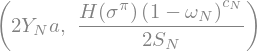

In [11]:
d_phi_N_0 = phi_ext.diff(Y_N).subs(eta,0)
a_solved = sp.solve(sp.Eq(d_phi_N_0, (1 - omega_N)**c_N * Y_N / S_N * H_switch ), a )[0]
#a_solved = sp.solve( sp.Eq( d_phi_N_0, (1 - omega_N)**c_N * Y_N / S_N ), a )[0]
d_phi_N_0, a_solved

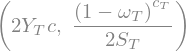

In [12]:
d_phi_T_0 = phi_ext.diff(Y_T).subs(eta,0)
c_solved = sp.solve( sp.Eq( d_phi_T_0, (1 - omega_T)**c_T * Y_T / S_T ), c )[0]
d_phi_T_0, c_solved

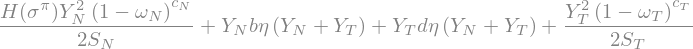

In [13]:
phi_ext_ac = phi_ext.subs({a: a_solved, c: c_solved})
phi_ext_ac

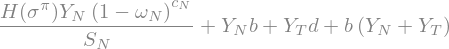

In [14]:
d_phi_N_1 = phi_ext_ac.diff(Y_N).subs(eta,1)
d_phi_N_1

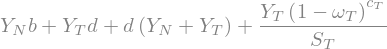

In [15]:
d_phi_T_1 = phi_ext_ac.diff(Y_T).subs(eta,1)
d_phi_T_1

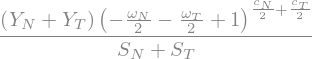

In [16]:
d_phi_1_req = (1 - (omega_N + omega_T)/2)**((c_N+c_T)/2) * (Y_N + Y_T) / (S_N + S_T) 
d_phi_1_req

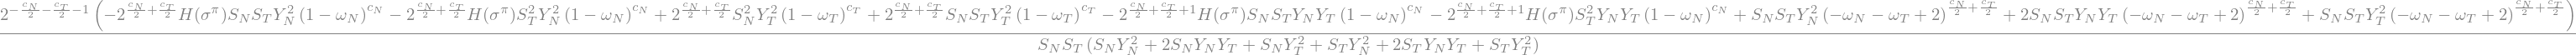

In [17]:
bd_solved = sp.solve({sp.Eq(d_phi_N_1, d_phi_1_req), sp.Eq(d_phi_T_1, d_phi_1_req)},[b,d])
sp.simplify(bd_solved[b])

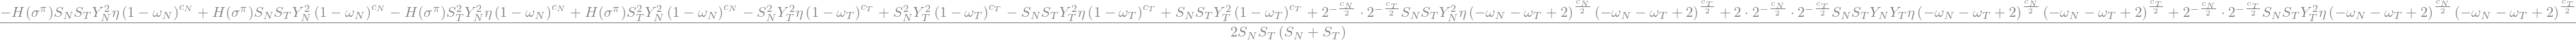

In [18]:
phi_abcd = phi_ext_ac.subs(bd_solved)
sp.simplify(phi_abcd)

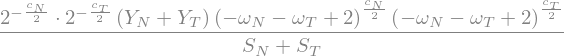

In [19]:
sp.simplify(phi_abcd.diff(Y_T).subs(eta,1))

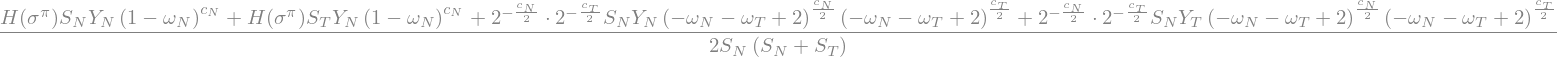

In [20]:
sp.simplify(phi_abcd.diff(Y_N).subs(eta,sp.Rational(1,2)))

# Geometric mean 

In [21]:
a,b,c,d = sp.symbols('a,b,c,d')
H = lambda x: sp.Piecewise( (0, x <=0 ), (1, True) )
H_switch, sig_pi = sp.symbols(r'H(\sigma^{\pi}), \sigma^\pi', real=True)
phi2_ext = a * Y_N**2 + b * eta * Y_N*(Y_N+Y_T) + c * Y_T**2 + d * eta * Y_T*(Y_N+Y_T)
phi2_ext

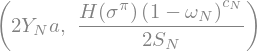

In [22]:
d_phi2_N_0 = phi2_ext.diff(Y_N).subs(eta,0)
a2_solved = sp.solve( sp.Eq( d_phi2_N_0, (1 - omega_N)**c_N * Y_N / S_N * H_switch ), a )[0]
#a_solved = sp.solve( sp.Eq( d_phi_N_0, (1 - omega_N)**c_N * Y_N / S_N ), a )[0]
d_phi2_N_0, a2_solved

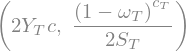

In [23]:
d_phi2_T_0 = phi2_ext.diff(Y_T).subs(eta,0)
c2_solved = sp.solve( sp.Eq( d_phi2_T_0, (1 - omega_T)**c_T * Y_T / S_T ), c )[0]
d_phi2_T_0, c2_solved

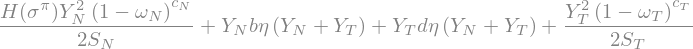

In [24]:
phi2_ext_ac = phi2_ext.subs({a: a2_solved, c: c2_solved})
phi2_ext_ac

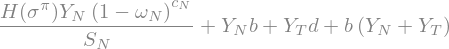

In [25]:
d_phi2_N_1 = phi2_ext_ac.diff(Y_N).subs(eta,1)
d_phi2_N_1

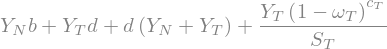

In [26]:
d_phi2_T_1 = phi2_ext_ac.diff(Y_T).subs(eta,1)
d_phi2_T_1

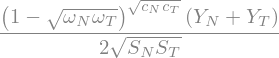

In [27]:
c_NT = sp.sqrt(c_N*c_T)
S_NT = sp.sqrt(S_N*S_T)
d_phi_2_req = (1 - sp.sqrt(omega_N*omega_T))**(c_NT) * (Y_N+Y_T) / (2*S_NT) 
d_phi_2_req

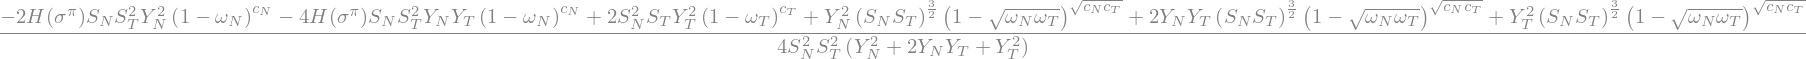

In [28]:
bd2_solved = sp.solve({sp.Eq(d_phi2_N_1, d_phi_2_req), sp.Eq(d_phi2_T_1, d_phi_2_req)},[b,d])
sp.simplify(bd2_solved[b])

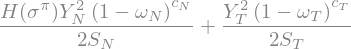

In [29]:
phi2_abcd = phi2_ext_ac.subs(bd2_solved)
sp.simplify(phi2_abcd).subs(eta,0)

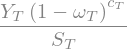

In [30]:
omega_T_solved_0 = sp.simplify(phi2_abcd.diff(Y_T).subs(eta,0))
omega_T_solved_0

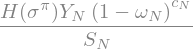

In [31]:
omega_N_solved_0 = sp.simplify(phi2_abcd.diff(Y_N).subs(eta,0))
omega_N_solved_0

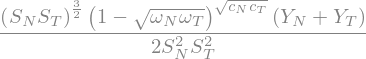

In [32]:
omega_N_solved_1 = sp.simplify(phi2_abcd.diff(Y_N).subs(eta,1))
omega_N_solved_1

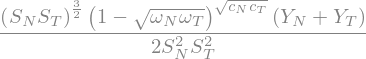

In [33]:
omega_T_solved_1 = sp.simplify(phi2_abcd.diff(Y_T).subs(eta,1))
omega_T_solved_1

**Archived compact version:** derived by Mirek for the case of dropped fundamental damage terms $(1 - \omega_\mathrm{N})^{c_\mathrm{N}}$ and $(1 - \omega_\mathrm{T})^{c_\mathrm{T}}$

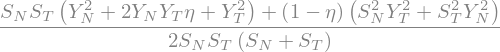

In [34]:
phi_simplified = (
    (( 1 - eta ) * ( Y_T**2 * S_N**2 + Y_N**2 * S_T**2 ) +
    S_N * S_T * ( Y_T**2 + Y_N**2 + 2 * Y_T * Y_N * eta )) /
    (2* S_N * S_T * ( S_N + S_T ))
)
phi_simplified

# Scaling of phi between coupled and uncoupled cases

In [35]:
def avg(var1, var2):
    return (var1 + var2) / 2
r = sp.symbols(r'r', positive=True)
c_NT = avg(c_N, c_T)
S_NT = avg(S_N, S_T)
omega_NT = avg(omega_N, omega_T)
Y_NT = avg(Y_N, Y_T)
phi_N = (1 - omega_N)**(c_N) * S_N/(r+1) * (Y_N/S_N)**(r+1) # * H_switch
phi_T = (1 - omega_T)**(c_T) * S_T/(r+1) * (Y_T/S_T)**(r+1)
phi_NT  = (1 - omega_NT)**(c_NT) * 2*S_NT/(r+1) * (Y_NT/S_NT)**(r+1)
phi_ = (1 - eta) * (phi_N + phi_T) + eta * phi_NT

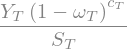

In [36]:
sp.simplify(phi_).subs(r,1).subs(eta,0).diff(Y_T)

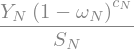

In [37]:
sp.simplify(phi_).subs(r,1).subs(eta,0).diff(Y_N)

# Derivation of potential from a damage function

In [38]:
A_d, Y_N, R_N, lambda_N = sp.symbols('A_d, Y_N, R_N, lambda_N')
dot_Y_N, dot_R_N = sp.symbols(r'\dot{Y}_N, \dot{R}_N')
E_N , eps_N = sp.symbols(r'E_N, \epsilon_N')
dot_eps_N = sp.symbols(r'\dot{\epsilon}_N')
r_N, dot_r_N = sp.symbols(r'r_N, \dot{r}_N')
f_N = sp.Function('f_N')(r_N)
omega_N = sp.symbols(r'\omega_N')
dot_omega_N = sp.symbols(r'\dot{\omega}_N')

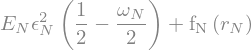

In [39]:
psi_omega = sp.Rational(1,2)*(1 - omega_N)*E_N*eps_N**2 + f_N
psi_omega

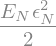

In [40]:
sigma_N_ = psi_omega.diff(eps_N)
Y_N_ = -psi_omega.diff(omega_N)
R_N_ = psi_omega.diff(r_N)
Y_N_

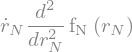

In [41]:
dot_R_N_ = R_N_.diff(r_N) * dot_r_N
dot_R_N_

In [42]:
dot_Y_N_ = Y_N_.diff(eps_N) * dot_eps_N + Y_N_.diff(omega_N) * dot_omega_N
dot_Y_N_

In [43]:
f_omega = Y_N - R_N

In [44]:
f_omega

In [45]:
dot_r_N_ = lambda_N * f_omega.diff(R_N)
dot_r_N_

In [46]:
dot_omega_N_ = lambda_N * f_omega.diff(Y_N)
dot_omega_N_

In [47]:
dot_f_omega_ = f_omega.diff(Y_N) * dot_Y_N_ + f_omega.diff(R_N) * dot_R_N_

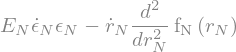

In [48]:
dot_f_omega_

In [49]:
dot_f_omega_lambda_ = dot_f_omega_.subs(dot_r_N, dot_r_N_)

In [50]:
lambda_N_solved = sp.solve(dot_f_omega_lambda_, lambda_N)[0]

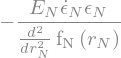

In [51]:
lambda_N_solved

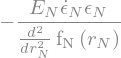

In [52]:
dot_omega_N_solved = dot_omega_N_.subs(lambda_N, lambda_N_solved)
dot_omega_N_solved

# Damage function from MS1 - N

**reference [74]**

In [53]:
omega_N_paper = 1 - 1 / (1 + A_d * Y_N_) 

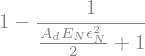

In [54]:
omega_N_paper

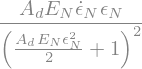

In [55]:
dot_omega_N_paper = omega_N_paper.diff(eps_N) * dot_eps_N
dot_omega_N_paper

**from potential**

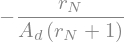

In [56]:
f_prime_r_N = 1 / A_d * -r_N / (1 + r_N)
f_prime_r_N

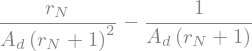

In [57]:
f_prime_r_N.diff(r_N)

In [58]:
dot_omega_N_potential = sp.simplify(- E_N * eps_N * dot_eps_N / f_prime_r_N.diff(r_N))
dot_omega_N_potential

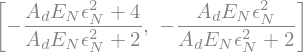

In [59]:
r_N_solved = sp.solve( sp.Eq( dot_omega_N_paper, dot_omega_N_potential ), r_N )
r_N_solved

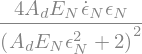

In [60]:
dot_omega_N_potential_solved = sp.simplify(dot_omega_N_potential.subs(r_N, r_N_solved[1]))
dot_omega_N_potential_solved

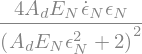

In [61]:
sp.simplify(dot_omega_N_paper)